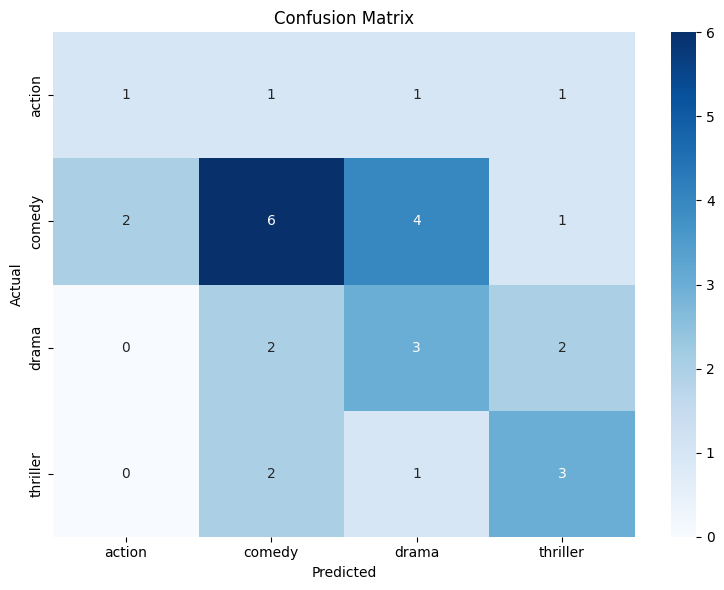

Accuracy: 0.43, Precision: 0.44, Recall: 0.43

Classification Report:
               precision    recall  f1-score   support

      action       0.33      0.25      0.29         4
      comedy       0.55      0.46      0.50        13
       drama       0.33      0.43      0.38         7
    thriller       0.43      0.50      0.46         6

    accuracy                           0.43        30
   macro avg       0.41      0.41      0.41        30
weighted avg       0.44      0.43      0.43        30



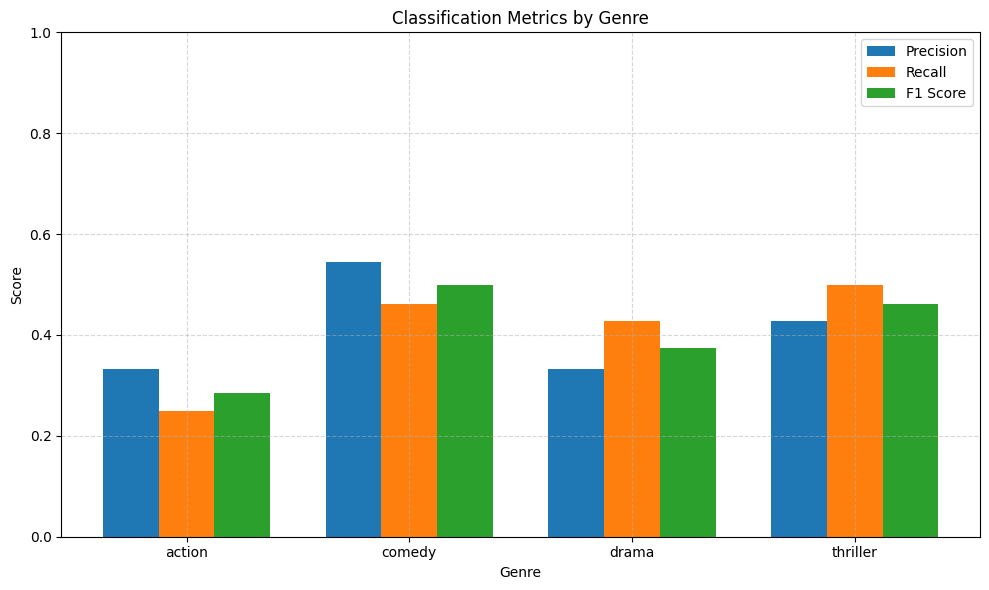

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("/content/movie_watch.csv")

# Classification target and features
X = df[['watch_time_hour', 'avg_rating_given']]
y = df['genre_preference']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Bar plot for each genre
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
labels = [label for label in report_dict if label in clf.classes_]
precisions = [report_dict[label]['precision'] for label in labels]
recalls = [report_dict[label]['recall'] for label in labels]
f1_scores = [report_dict[label]['f1-score'] for label in labels]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1 Score')

plt.ylabel('Score')
plt.xlabel('Genre')
plt.title('Classification Metrics by Genre')
plt.xticks(ticks=x, labels=labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


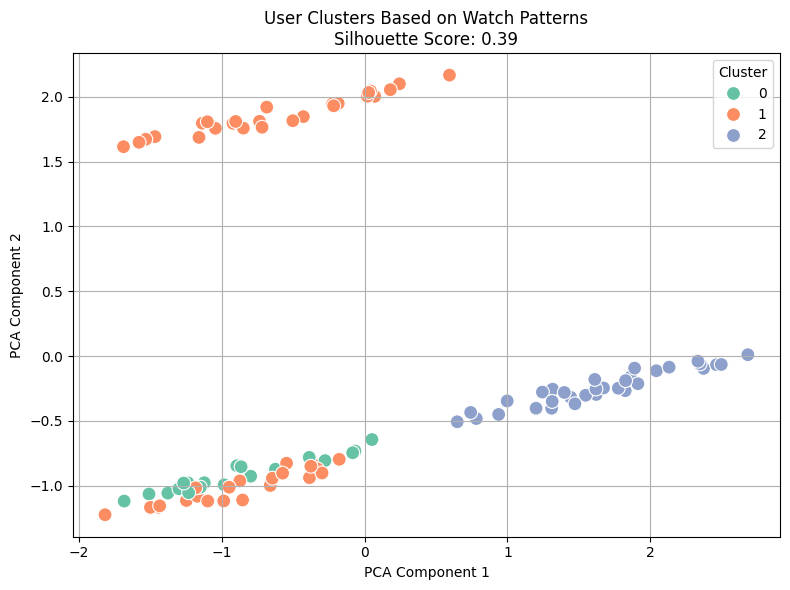

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Encode genre
df_encoded = pd.get_dummies(df, columns=['genre_preference'])

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Silhouette score
silhouette = silhouette_score(X_scaled, clusters)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title(f'User Clusters Based on Watch Patterns\nSilhouette Score: {silhouette:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
